# MACHINE LEARNING MODEL TO CLASSIFY HOW MUCH LOAN A USER CAN TAKE

In [1]:

#importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import itertools
import warnings
warnings.filterwarnings('ignore')
import os
import io
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

sns.set()
sns.set(font_scale=1.5)

%matplotlib inline

In [2]:
#reading data from csv file
train=pd.read_csv('train_data.csv')
#loading test data
test=pd.read_csv('test_data.csv')

In [3]:
#looking at the number of rows and columns of the train data
train.shape

(614, 13)

In [4]:
#looking at the number of rows and columns of the test data
test.shape

(367, 12)

In [5]:
#view database information including shape, type and description names of the train data. etc
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
##count the number of unique values for each of the descriptors
train.nunique()

,0
Loan_ID,614
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
ApplicantIncome,505
CoapplicantIncome,287
LoanAmount,203
Loan_Amount_Term,10


In [7]:
#staististical inference from the data
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
#looking atn the various descriptors
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# CLEANING DATA

In [9]:
#looking at the null values in the train dataset
train.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [10]:
#2.null values imputation
cat_null=['Gender','Married','Dependents','Self_Employed','Credit_History','LoanAmount','Loan_Amount_Term']
train[cat_null]=train[cat_null].replace({np.nan:train['Gender'].mode(),
                                        np.nan:train['Married'].mode(),
                                        np.nan:train['Dependents'].mode(),
                                        np.nan:train['Self_Employed'].mode(),
                                        np.nan:train['Credit_History'].mode(),
                                        np.nan:train['LoanAmount'].mean(),
                                        np.nan:train['Loan_Amount_Term'].mean()})

In [11]:
train.isnull().sum()  ##the null values has been filled. Now there is no null value in the train dataset

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


# EXPLORATORY DATA ANALYSIS

In [12]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,342.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


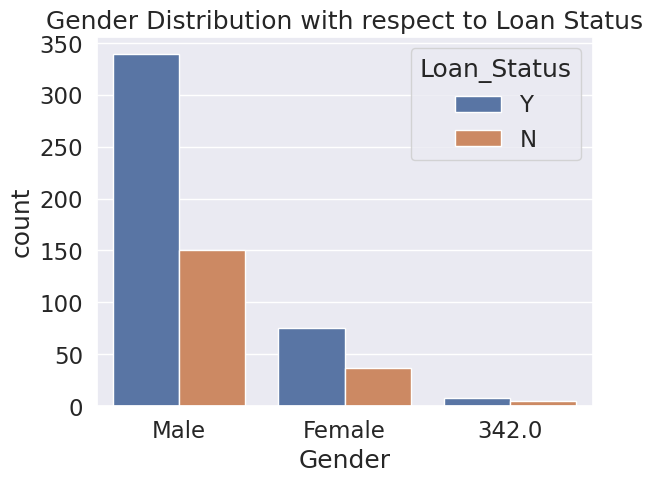

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.title('Gender Distribution with respect to Loan Status')
sns.countplot(x='Gender', hue='Loan_Status', data=train)
plt.show()


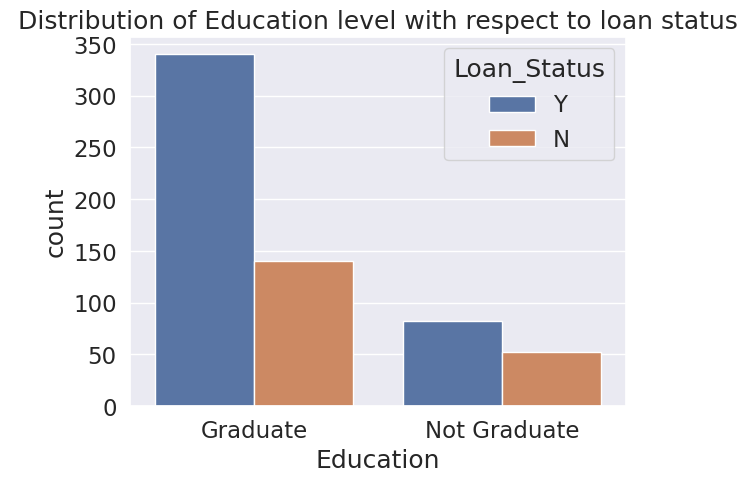

In [14]:
#Education Distribution of applicants
plt.title(' Distribution of Education level with respect to loan status ')
sns.countplot(x='Education', hue='Loan_Status',data = train)
plt.show()

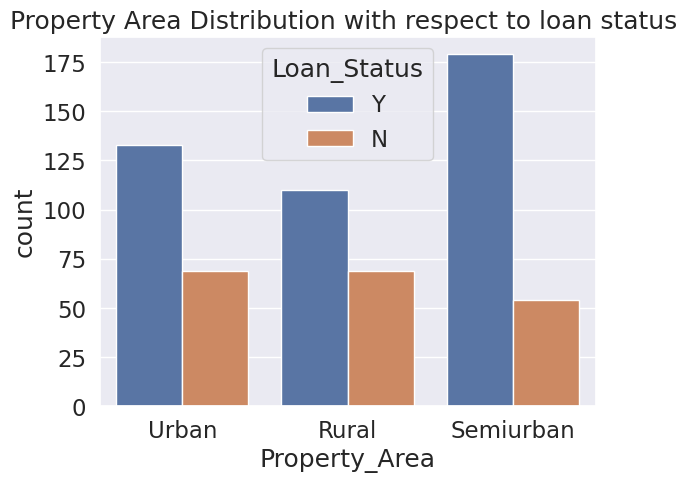

In [15]:
#Gender Distribution
plt.title('Property Area Distribution with respect to loan status ')
sns.countplot(x='Property_Area',hue='Loan_Status',data = train)
plt.show()

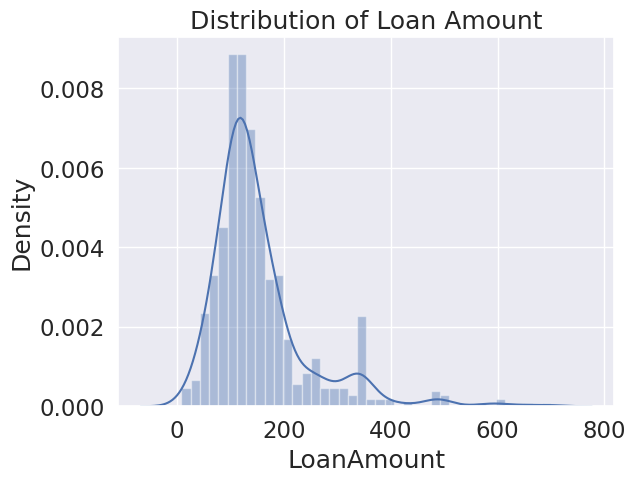

In [16]:
#Distribution of loan amount
plt.title('Distribution of Loan Amount')
sns.distplot(train['LoanAmount'])
plt.show()

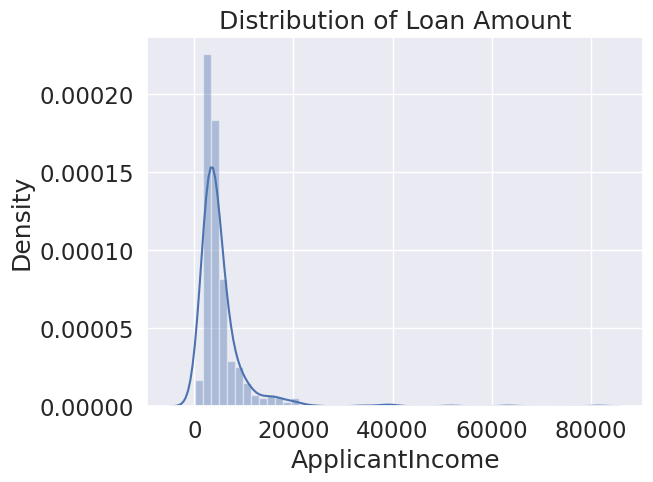

In [17]:
#Distribution of applicant income
plt.title('Distribution of Loan Amount')
sns.distplot(train['ApplicantIncome'])
plt.show()

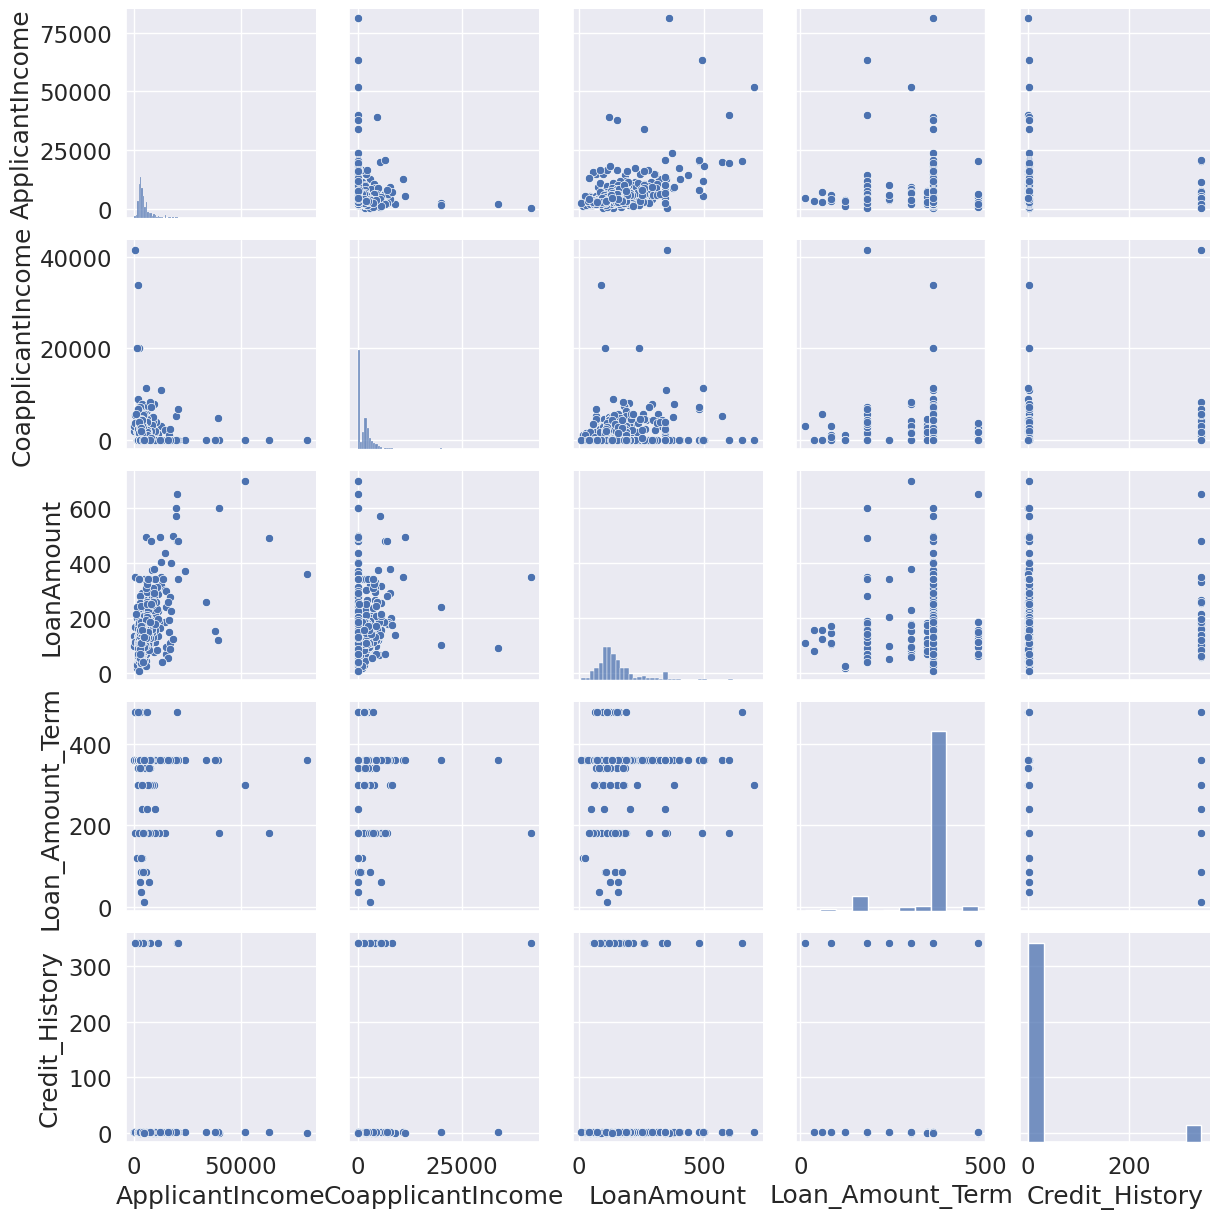

In [18]:
# This shows the relationship for (n,2) combination of variable in a DataFrame
# as a matrix of plots and the diagonal plots are the univariate plots.
sns.pairplot(train);


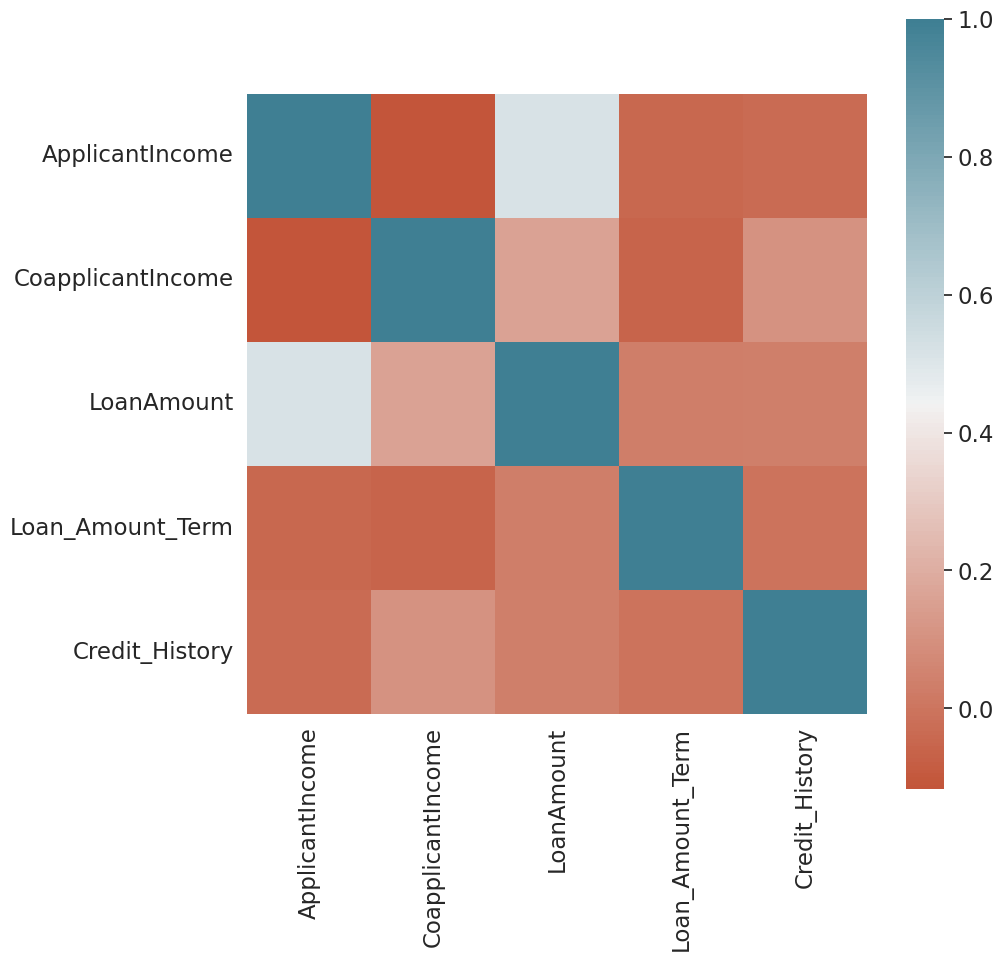

In [21]:
# Filter to select only numeric columns for the correlation heatmap
numeric_cols = train.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 10))
sns.heatmap(numeric_cols.corr(), cmap=sns.diverging_palette(20, 220, n=200), square=True)
plt.show()


# PREPROCESSING THE DATA

# _use one hot encoding to convert categorical variables to numerical_

In [23]:
# One-hot encode specific columns and concatenate with the original DataFrame
train = pd.concat([train.drop(['Gender', 'Married', 'Dependents'], axis=1),
                   pd.get_dummies(train[['Gender', 'Married', 'Dependents']], drop_first=True)], axis=1)


# PREDICTIVE MODELLING

In [26]:
print(train.columns)


Index(['Loan_ID', 'Education', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area', 'Loan_Status', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+'],
      dtype='object')


In [28]:
##extracting independent variables
# Selecting the appropriate columns for the independent variables
X = train[['Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes',
           'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
           'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome',
           'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
           'Property_Area']]


#target variable
y=train['LoanAmount']

In [29]:
import pandas as pd

# Check the data types in X
print(X.dtypes)

# Identify columns with mixed types
for col in X.columns:
    if X[col].apply(type).nunique() > 1:
        print(f"Column '{col}' has mixed types.")
        # Convert the column to string type or a numeric type as appropriate
        X[col] = X[col].astype(str)  # Convert to string to handle non-numeric values uniformly

# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)


Gender_Female           bool
Gender_Male             bool
Married_No              bool
Married_Yes             bool
Dependents_0            bool
Dependents_1            bool
Dependents_2            bool
Dependents_3+           bool
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object
Column 'Self_Employed' has mixed types.


In [30]:
#importing libraries for prediction
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit, KFold
import xgboost
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# model training

In [31]:
#spliting the datset into test and train
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
print('X Test:',X_test.shape)
print('X Train:',X_train.shape)

X Test: (185, 18)
X Train: (429, 18)


# KFOLD CROSS VALIDATION

In [32]:
from sklearn.model_selection import KFold

# Applying cross-validation with KFold
kfold = KFold(n_splits=5, shuffle=False)

# Returns the number of splitting iterations in the cross-validator
n_splits = kfold.get_n_splits(X)
print("Number of splits:", n_splits)


Number of splits: 5


In [33]:
for train_index, test_index in kfold.split(X):
    print("Train:",train_index,"Test:", test_index)


Train: [123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140
 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158
 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176
 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194
 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212
 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230
 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248
 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266
 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284
 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302
 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320
 321 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338
 339 340 341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356
 357 358 359 360 361 362 363 364 365 366 367

# NORMALIZING THE DATA

In [34]:
#normalizing the dataset to ensure that certain features do not affect the final prediction more than the other features
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit_transform(X)


array([[0., 1., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 1., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [1., 0., 1., ..., 1., 1., 0.]])

# RANDOM FOREST REGRESSOR

In [35]:
rf=RandomForestRegressor(n_estimators=100,max_depth=20,min_samples_leaf=2,min_samples_split=3)
rf_model=rf.fit(X_train,y_train)
rf_pred=rf.predict(X_test)
rf_mse=mean_squared_error(rf_pred, y_test)
rf_std=np.std(rf_pred)
print('Test Score', rf_model.score(X_test, y_test))
print('Train Score', rf_model.score(X_train, y_train))
scores=cross_val_score(rf, X,y, cv=5)
print(np.mean(scores))

Test Score 0.9974702938598475
Train Score 0.9975491203004037
0.9922932190926957


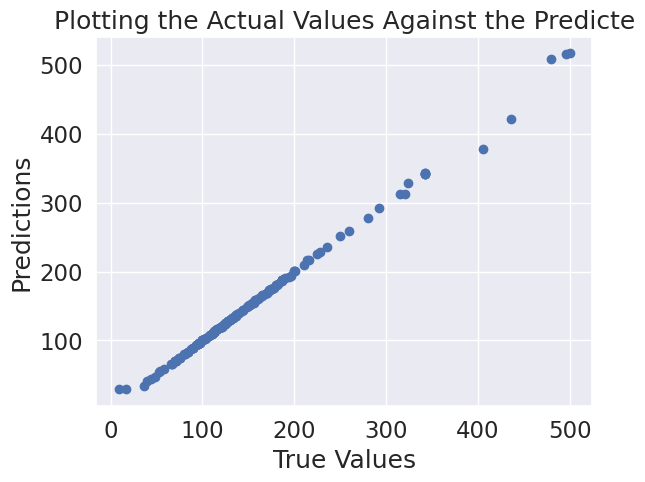

In [36]:
plt.title('Plotting the Actual Values Against the Predicte')
plt.scatter(y_test, rf_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

# KNN REGRESSOR

In [37]:
#using the K nearest neighbor
kn=KNeighborsRegressor()
kn_model=kn.fit(X_train,y_train)
kn_pred=kn.predict(X_test)
kn_mse=mean_squared_error(kn_pred,y_test)
kn_std=np.std(kn_pred)

print('Test Score:', kn_model.score(X_test, y_test))
print('Train Score:',kn_model.score(X_train, y_train))
scores=cross_val_score(kn, X,y, cv=5)
print('CV Score:', np.mean(scores))

Test Score: 0.31937818064367973
Train Score: 0.6054772950043708
CV Score: 0.3925421544705385


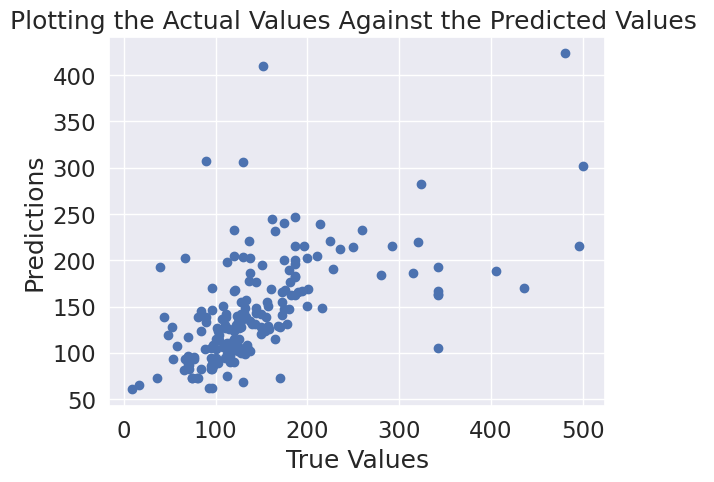

In [38]:
plt.title('Plotting the Actual Values Against the Predicted Values ')
plt.scatter(y_test, kn_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

# DECISION TREE

In [39]:
#using the K nearest neighbor
dt=DecisionTreeRegressor()
dt_model=dt.fit(X_train,y_train)
dt_pred=dt.predict(X_test)
dt_mse=mean_squared_error(dt_pred,y_test)
dt_std=np.std(dt_pred)

print('Test Score:', dt_model.score(X_test, y_test))
print('Train Score:',dt_model.score(X_train, y_train))
scores=cross_val_score(dt, X,y, cv=5)
print('CV Score:', np.mean(scores))

Test Score: 0.9981253612590754
Train Score: 1.0
CV Score: 0.9923965771240614


# SVM REGRESSOR

In [40]:
from sklearn.svm import SVR
sv=SVR()
sv_model=sv.fit(X_train,y_train)
sv_pred=sv.predict(X_test)
sv_std=np.std(sv_pred)

sv_mse=mean_squared_error(sv_pred,y_test)
print('Test Score', sv_model.score(X_test, y_test))
print('Train Score',sv_model.score(X_train, y_train))
scores=cross_val_score(sv, X,y, cv=5)
print(np.mean(scores))

Test Score 0.15616396621751794
Train Score 0.08798564420265287
0.11838483772993866


# ADABOOST REGRESSOR

In [41]:
ada=AdaBoostRegressor(n_estimators=200, learning_rate=1.0)
ada_model=ada.fit(X_train,y_train)
ada_pred=ada.predict(X_test)
ada_mse=mean_squared_error(ada_pred,y_test)
ada_std=np.std(ada_pred)


print('Test Score:', ada_model.score(X_test, y_test))
print('Train Score:',ada_model.score(X_train, y_train))
scores=cross_val_score(ada, X,y, cv=5)
print('CV Score:', np.mean(scores))

Test Score: 0.9752528232947056
Train Score: 0.9867598536879205
CV Score: 0.9883828042404106


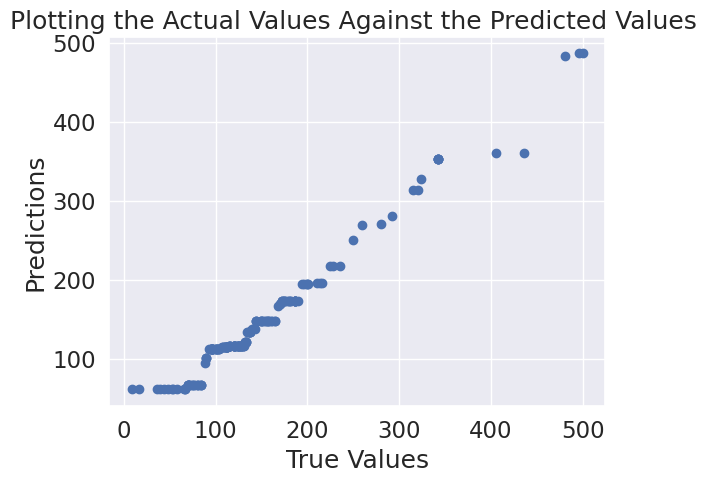

In [42]:
plt.title('Plotting the Actual Values Against the Predicted Values ')
plt.scatter(y_test, ada_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

# GRADIENT BOOSTING REGRESSOR

In [43]:
gb=GradientBoostingRegressor()
gb_model=gb.fit(X_train,y_train)
gb_pred=gb.predict(X_test)
gb_mse=mean_squared_error(gb_pred,y_test)
gb_std=np.std(gb_pred)

print('Test Score:', gb_model.score(X_test, y_test))
print('Train Score:',gb_model.score(X_train, y_train))
scores=cross_val_score(gb, X,y, cv=5)
print('CV Score:', np.mean(scores))

Test Score: 0.998422821899148
Train Score: 0.9999745767813168
CV Score: 0.9972428005832568


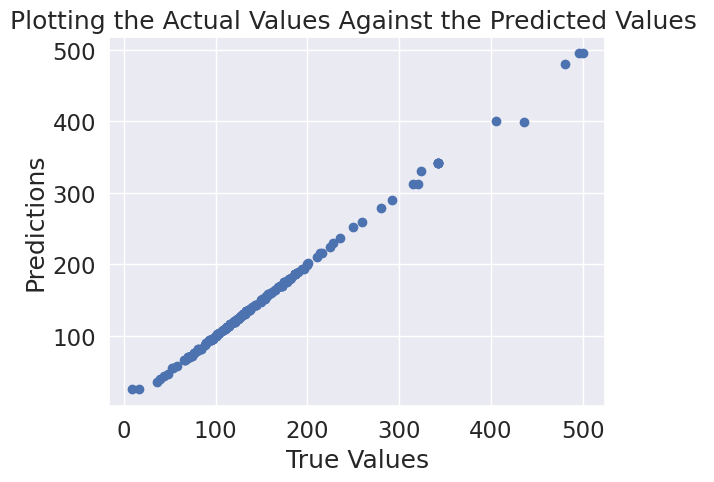

In [44]:
plt.title('Plotting the Actual Values Against the Predicted Values ')
plt.scatter(y_test, gb_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

# XGBOOST REGRESSOR

In [45]:
xgb=xgboost.XGBRegressor()
xgb_model=xgb.fit(X_train,y_train)
xgb_pred=xgb.predict(X_test)
xgb_mse= mean_squared_error(xgb_pred,y_test)
xgb_std=np.std(xgb_pred)

print('Test Score:', xgb_model.score(X_test, y_test))
print('Train Score:',xgb_model.score(X_train, y_train))
scores=cross_val_score(xgb, X,y, cv=5)
print('CV Score:', np.mean(scores))

Test Score: 0.9982487736883069
Train Score: 0.9999998912608233
CV Score: 0.9959451315419171


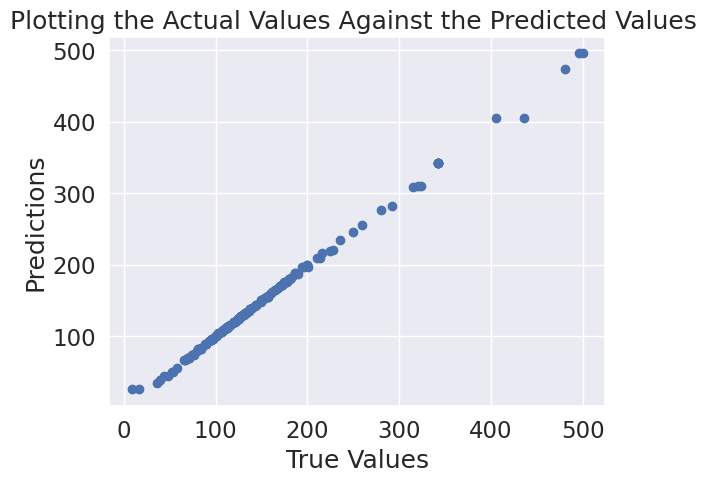

In [46]:
plt.title('Plotting the Actual Values Against the Predicted Values ')
plt.scatter(y_test, xgb_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

In [47]:
models=['Random Forest', 'XGBoost', 'KNN', 'Decision Tree', 'Ada Boost','Gradient Boosting']
mse=[rf_mse, xgb_mse, kn_mse, dt_mse, ada_mse, gb_mse]
pd.DataFrame(mse, index=models)

,0
Random Forest,16.944547
XGBoost,11.730112
KNN,4558.959784
Decision Tree,12.556757
Ada Boost,165.762219
Gradient Boosting,10.564298


<Axes: >

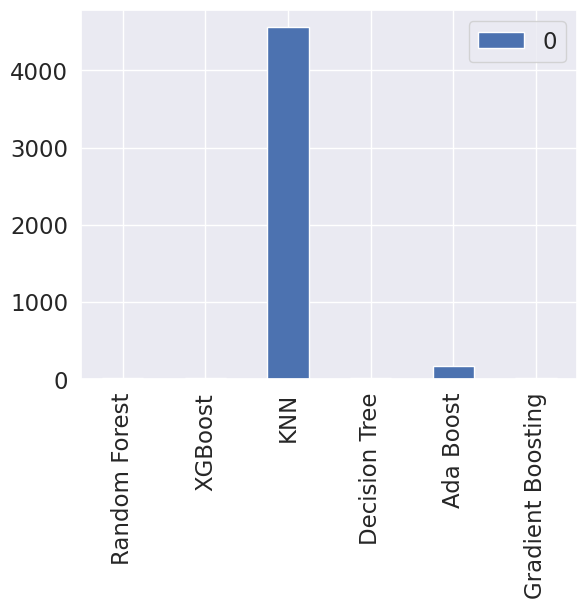

In [48]:
pd.DataFrame(mse, index=models).plot.bar()

KNN gave the smallest mean squared value. we proceed to save this model for the model deployment

# FEATURE IMPORTANCE

# _checking for important features_

In [49]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [50]:
model.feature_importances_


array([4.01503589e-05, 5.03845518e-04, 5.92967446e-04, 4.40592787e-05,
       1.72005838e-04, 3.51441604e-05, 5.07455883e-05, 1.10093651e-03,
       2.73589970e-02, 1.06840424e-03, 9.65624367e-01, 1.58484197e-03,
       1.03839540e-04, 5.10752789e-05, 2.77764249e-04, 1.69126962e-04,
       5.22096255e-04, 6.99632822e-04])

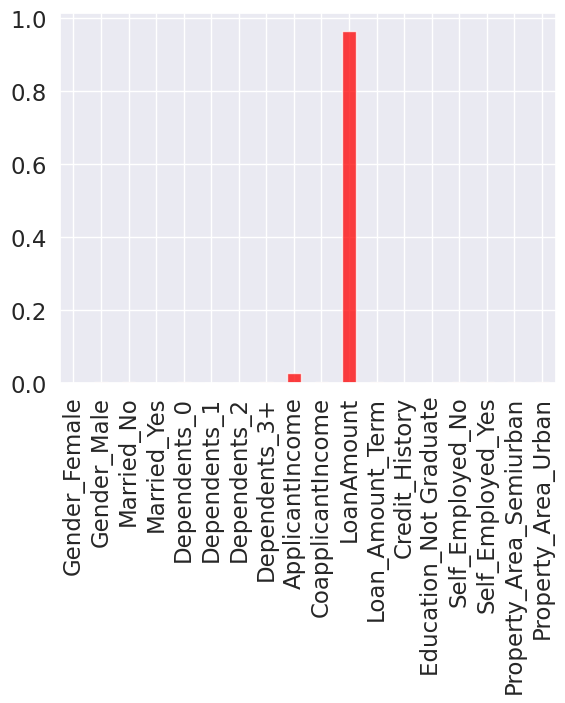

In [51]:
pd.Series(model.feature_importances_, index=X.columns).plot(kind='bar',alpha=0.75, rot=90, color='red');


**_The strongest predictors are Applicant Income and Co-applicant Income_**

# Exporting the tested model to a pickle file

In [53]:
#saving and storing the data for deployment with streamlit
import pickle

# Save the model
with open('blossom.pkl', 'wb') as file:
    pickle.dump(kn, file)


In [54]:
with open('blossom.pkl', 'rb') as file:
    model = pickle.load(file)
